# Homework 1

In [58]:
## Importing Libararies 

import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [59]:
# Reading in df
df = pd.read_csv('table_b_1.csv')

# Question 2.1.a)

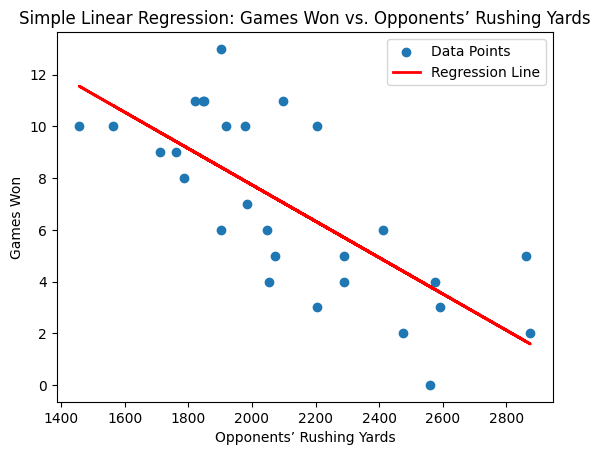

Intercept: 21.788250882413028
Coefficient (slope): -0.007025100276006444


In [60]:
# Create and fit the linear regression model
X = df[['x8']]  # Independent variable
y = df['y']      # Dependent variable

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions using the model
predictions = model.predict(X)

# Plot the data points and the regression line
plt.scatter(X, y, label='Data Points')
plt.plot(X, predictions, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Opponents’ Rushing Yards')
plt.ylabel('Games Won')
plt.legend()
plt.title('Simple Linear Regression: Games Won vs. Opponents’ Rushing Yards')
plt.show()

# Print the coefficients of the linear regression model
print('Intercept:', model.intercept_)
print('Coefficient (slope):', model.coef_[0])

# Question 2.1.b

In [61]:
# Fit a linear regression model
model = ols('y ~ x8', data=df).fit()

# Print the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     31.10
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           7.38e-06
Time:                        12:45:07   Log-Likelihood:                -63.123
No. Observations:                  28   AIC:                             130.2
Df Residuals:                      26   BIC:                             132.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.7883      2.696      8.081      0.0

# Question 2.1.c)

In [45]:

print("\nQuestion 2.1.c")
# Calculate the 95% confidence interval for the slope
slope_ci = model.conf_int(alpha=0.05)

# Print the confidence interval for the slope (x8)
print(f'95% Confidence Interval for the Slope of x8:')
print(slope_ci.loc['x8'])


Question 2.1.c
95% Confidence Interval for the Slope of x8:
0   -0.009614
1   -0.004436
Name: x8, dtype: float64


# Question 2.1.d)

In [64]:
# Fit a linear regression model
model = ols('y ~ x8', data=df).fit()

# Get the 95% confidence interval on the slope
ci = model.conf_int(alpha=0.05)
print(ci)
print("95% CI = [-0.009614, -0.004436]")

                   0          1
Intercept  16.246064  27.330438
x8         -0.009614  -0.004436
95% CI = [-0.009614, -0.004436]


# Question 2.1.e)

In [68]:
# Specify the value of x8 for which you want to predict the mean number of games won
x8_value = 2000

# Create a DataFrame with the specified x8 value
predict_data = pd.DataFrame({'x8': [x8_value]})

# Use the model to make predictions
predictions = model.get_prediction(predict_data)

# Get the 95% confidence interval for the mean
ci = predictions.summary_frame(alpha=0.05)
lower_bound = ci.iloc[0]['obs_ci_lower']
upper_bound = ci.iloc[0]['obs_ci_upper']

print(f"95% CI on the mean number of games won when x8 = {x8_value} yards: [{lower_bound:.2f}, {upper_bound:.2f}]")

95% CI on the mean number of games won when x8 = 2000 yards: [2.72, 12.75]


# Question 2.2)

In [69]:
# Fit a linear regression model
model = ols('y ~ x8', data=df).fit()

# Specify the value of x8 for which you want to make a prediction
x8_value = 1800

# Create a DataFrame with the specified x8 value
predict_data = pd.DataFrame({'x8': [x8_value]})

# Use the model to make a point estimate prediction
point_estimate = model.predict(predict_data).iloc[0]

# Calculate a 90% prediction interval
prediction_interval = model.get_prediction(predict_data).summary_frame(alpha=0.10)
lower_bound = prediction_interval.iloc[0]['obs_ci_lower']
upper_bound = prediction_interval.iloc[0]['obs_ci_upper']

print(f"Point estimate of games won when x8 = {x8_value} yards: {point_estimate:.2f}")
print(f"90% Prediction interval on games won: [{lower_bound:.2f}, {upper_bound:.2f}]")

Point estimate of games won when x8 = 1800 yards: 9.14
90% Prediction interval on games won: [4.94, 13.35]
